The code snippet below was written to convert tsv file to csv.

In [1]:
import re
 
# reading given tsv file
with open("testset_B.tsv", 'r') as myfile: 
  with open("testset_B.csv", 'w') as csv_file:
    for line in myfile:
       
      # Replace every tab with comma
      fileContent = re.sub("\t", ",", line)
       
      # Writing into csv file
      csv_file.write(fileContent)
 
# output
print("Successfully made csv file")

Successfully made csv file


The code snippets here, connect to the MySQL DB and make 3 Queries to address what has been asked in the first task.

In [8]:
import sqlalchemy as db
import json

# specify database configurations
config = {
    'host': 'localhost',
    'port': 3306,
    'user': 'root',
    'password': 'my-secret-pw',
    'database': 'my_db'
}

db_user = config.get('user')
db_pwd = config.get('password')
db_host = config.get('host')
db_port = config.get('port')
db_name = config.get('database')

# specify connection string
connection_str = f'mysql+pymysql://{db_user}:{db_pwd}@{db_host}:{db_port}/{db_name}'

# connect to database
try:
    db_engine = db.create_engine(connection_str)
    print("Connected successfully!!!")
except:  
    print("Could not connect to MongoDB")

statement_1 = "SELECT \
                RANK() OVER(ORDER BY AVG(price) ASC) AS ranking_for_price, \
                brand \
               FROM testset_B \
               GROUP BY brand;"

statement_2 = "SELECT \
                MIN(HDD_GB) AS Smallest_HDD_GB,\
                MAX(HDD_GB) AS Biggest_HDD_GB\
               FROM testset_B;"

statement_ = "set @rowindex := -1;"
statement_3 = "SELECT AVG(INNER_SELECT_RESULT.GHz), INNER_SELECT_RESULT.RAM_GB \
               FROM \
               ( \
                SELECT @rowindex := @rowindex+1 AS rowindex, RAM_GB, GHz \
                FROM testset_B \
                ORDER BY GHz \
               ) AS INNER_SELECT_RESULT\
               WHERE INNER_SELECT_RESULT.rowindex IN (FLOOR(@rowindex/2), CEIL(@rowindex/2)) \
               GROUP BY INNER_SELECT_RESULT.RAM_GB;"

result_1_as_dict = []
result_2_as_dict = []
result_3_as_dict = []

with db_engine.connect() as db_conn:  
    result_1 = db_conn.execute(statement_1)
    result_2 = db_conn.execute(statement_2)
    _ = db_conn.execute(statement_)
    result_3 = db_conn.execute(statement_3)
    
    result_1_as_dict = [dict(row) for row in result_1]
    print(result_1_as_dict)
    print("----------------------------")
    result_2_as_dict = [dict(row) for row in result_2]
    print(result_2_as_dict)
    print("----------------------------")
    result_3_as_dict = [dict(row) for row in result_3]
    print(result_3_as_dict)
    # for row in result_1:
    #     print(dict(row))
    # for row in result_2:
    #     print(dict(row))
    # for row in result_3:
    #     print(dict(row))
# Save result to MongoDB:

Connected successfully!!!
[{'ranking_for_price': 1, 'brand': 'Lenovo'}, {'ranking_for_price': 2, 'brand': 'HP'}, {'ranking_for_price': 3, 'brand': 'MSI'}, {'ranking_for_price': 4, 'brand': 'Samsung'}, {'ranking_for_price': 5, 'brand': 'Acer'}, {'ranking_for_price': 6, 'brand': 'Toshiba'}, {'ranking_for_price': 7, 'brand': 'asus'}, {'ranking_for_price': 8, 'brand': 'Microsoft'}, {'ranking_for_price': 9, 'brand': 'unknown'}, {'ranking_for_price': 10, 'brand': 'DELL'}, {'ranking_for_price': 11, 'brand': 'Apple'}]
----------------------------
[{'Smallest_HDD_GB': 500, 'Biggest_HDD_GB': 2000}]
----------------------------
[{'AVG(INNER_SELECT_RESULT.GHz)': 2.5, 'RAM_GB': 4}]


The code snippet below, will address the second part of the first task, to connect to MongoDB and store all the queries from the code snippet above.

In [9]:
from pymongo import DeleteMany, MongoClient
  
try:
    conn = MongoClient()
    print("Connected successfully!!!")
except:  
    print("Could not connect to MongoDB")
  
# database
db = conn.database
  
# Created or Switched to collection names: my_gfg_collection
collection = db.my_gfg_collection

db.my_gfg_collection.delete_many({})
 
# Insert Data
rec_id1 = collection.insert_many(result_1_as_dict)
rec_id2 = collection.insert_many(result_2_as_dict)
rec_id3 = collection.insert_many(result_3_as_dict)
  
print("Data inserted with record ids",rec_id1," ",rec_id2, " ",rec_id3)
  
# Printing the data inserted
cursor = collection.find()
for record in cursor:
    print(record)

Connected successfully!!!
Data inserted with record ids <pymongo.results.InsertManyResult object at 0x17784a670>   <pymongo.results.InsertManyResult object at 0x17784a6a0>   <pymongo.results.InsertManyResult object at 0x17784a5b0>
{'_id': ObjectId('6358ffb087c88d90d8f7834c'), 'ranking_for_price': 1, 'brand': 'Lenovo'}
{'_id': ObjectId('6358ffb087c88d90d8f7834d'), 'ranking_for_price': 2, 'brand': 'HP'}
{'_id': ObjectId('6358ffb087c88d90d8f7834e'), 'ranking_for_price': 3, 'brand': 'MSI'}
{'_id': ObjectId('6358ffb087c88d90d8f7834f'), 'ranking_for_price': 4, 'brand': 'Samsung'}
{'_id': ObjectId('6358ffb087c88d90d8f78350'), 'ranking_for_price': 5, 'brand': 'Acer'}
{'_id': ObjectId('6358ffb087c88d90d8f78351'), 'ranking_for_price': 6, 'brand': 'Toshiba'}
{'_id': ObjectId('6358ffb087c88d90d8f78352'), 'ranking_for_price': 7, 'brand': 'asus'}
{'_id': ObjectId('6358ffb087c88d90d8f78353'), 'ranking_for_price': 8, 'brand': 'Microsoft'}
{'_id': ObjectId('6358ffb087c88d90d8f78354'), 'ranking_for_pric

In this part we will try to address the "House Price Prediction" task.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
X = [1400,1600,1700,1875,1100,1550,2350,2450,1425,1700]
Y = [245,312,279,308,199,219,405,324,319,255]

In [12]:
len(X), len(Y)

(10, 10)

plotting the data trying to discover it a bit.

Text(0.5, 0, 'Price')

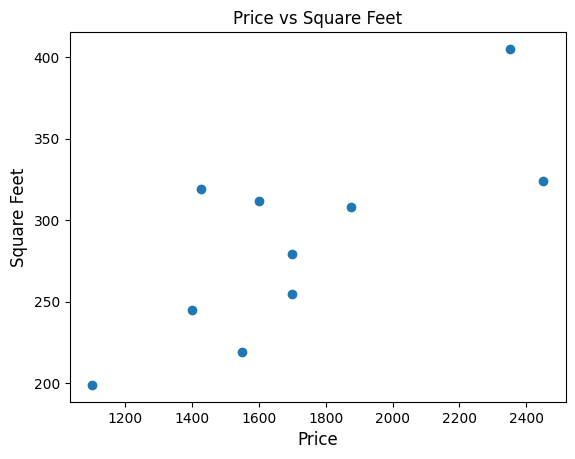

In [13]:
plt.scatter(X,Y)
plt.title("Price vs Square Feet")
plt.ylabel('Square Feet', fontsize=12)
plt.xlabel('Price', fontsize=12)

In [14]:
import seaborn as sns

Trying to figure if the data skewed to the right/left.

/var/folders/gv/8c00s1091s54cpjhkf3_8c_80000gn/T/ipykernel_55714/129081890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X)


<AxesSubplot: ylabel='Density'>

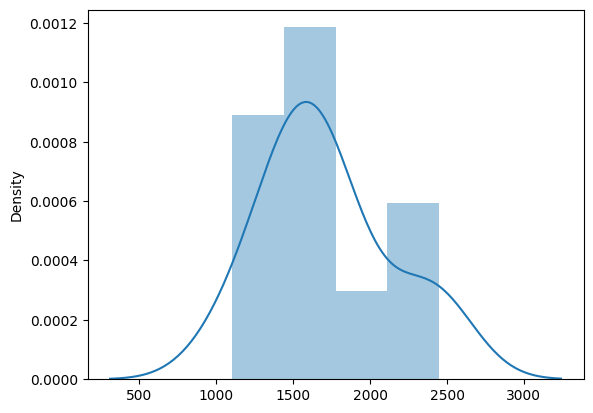

In [15]:
sns.distplot(X)

Trying to find the outliers.

<AxesSubplot: >

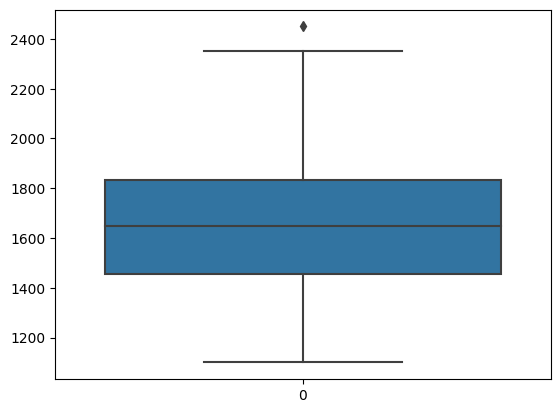

In [16]:
sns.boxplot(X)

In [17]:
# find the limits of the normal dist's curve.
upper_limit = np.array(X).mean() + 3*np.array(X).std()
lower_limit = np.array(X).mean() - 3*np.array(X).std()
upper_limit, lower_limit

(2904.264478574888, 525.7355214251122)

In [18]:
# find the outliers.
upper_outliers = np.array(X) > upper_limit
lower_outliers = np.array(X) < lower_limit
upper_outliers, lower_outliers
# no outliers......

(array([False, False, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False]))

Building the model and scaling the values.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import ensemble

In [20]:
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler_x = StandardScaler()
scaler_x.fit((np.array(X).reshape(-1, 1)))
scaler_y = StandardScaler()
scaler_y.fit((np.array(Y).reshape(-1, 1)))

StandardScaler()

In [23]:
x = scaler_x.transform((np.array(X).reshape(-1, 1)))
y = scaler_y.transform((np.array(Y).reshape(-1, 1))) # think about using np.log10(y), to inverse it np.exp()
x,y

(array([[-0.79460878],
        [-0.29009527],
        [-0.03783851],
        [ 0.40361081],
        [-1.55137905],
        [-0.41622365],
        [ 1.6018304 ],
        [ 1.85408716],
        [-0.73154459],
        [-0.03783851]]),
 array([[-0.72683522],
        [ 0.4466096 ],
        [-0.13135576],
        [ 0.37655319],
        [-1.53248391],
        [-1.18220187],
        [ 2.07542106],
        [ 0.65677882],
        [ 0.56920831],
        [-0.55169421]]))

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x.reshape(-1, 1), 
                                                       y.reshape(-1, 1), 
                                                       test_size = 0.2,
                                                       random_state =2)

In [25]:
reg.fit(x_train,y_train)

LinearRegression(n_jobs=2)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(y_test, reg.predict(x_test))

0.30823530059006343

In [28]:
reg.score(x_test,y_test)

0.6852181089549264

In [29]:
pred_y = reg.predict(scaler_x.transform(np.array([2350]).reshape(1, -1)))
pred_y_rescaled = scaler_y.inverse_transform(pred_y)
final_y = np.around(pred_y_rescaled)
pred_y_rescaled, final_y

(array([[350.88057816]]), array([[351.]]))

Saving the model and the x,y scalars

In [30]:
import pickle

In [31]:
pickle.dump(reg, open("reg_model.pkl", "wb"))
pickle.dump(scaler_x, open("scaler_x.pkl", "wb"))
pickle.dump(scaler_y, open("scaler_y.pkl", "wb"))

In [32]:
loaded_model = pickle.load(open("reg_model.pkl", "rb"))
loaded_scaler_x = pickle.load(open("scaler_x.pkl", "rb"))
loaded_scaler_y = pickle.load(open("scaler_y.pkl", "rb"))

In [50]:
pred_y = loaded_model.predict(loaded_scaler_x.transform(np.array([2350]).reshape(1, -1)))
pred_y_rescaled = loaded_scaler_y.inverse_transform(pred_y)
final_y = np.around(pred_y_rescaled)
pred_y_rescaled, final_y

(array([[350.88057816]]), 351.0)

You could try this code snippet after you run the server from main.py file

In [52]:
import json
import requests

url = "http://127.0.0.1:8000/price_prediction/"

input_for_model = {'square_meter':2350}
input_json = json.dumps(input_for_model)
response = requests.post(url, input_json)
print(response.text)

{"msg":"Prediction Done!","Price":351.0}
